<a href="https://colab.research.google.com/github/ahana2611/Self-study-Projects/blob/main/MLP%20for%20classification%20using%20Keras%20Sequential%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTILAYER PERCEPTRON FOR CLASSIFICATION USING KERAS SEQUENTIAL API**

In [37]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

Retrieve and Analyze the Dataset

In [12]:
#load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#extract training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [13]:
#check the full training set size
print("Full train dataset shape: ",X_train_full.shape)
print("Test dataset shape: ",X_test.shape)

Full train dataset shape:  (60000, 28, 28)
Test dataset shape:  (10000, 28, 28)


In [14]:
#print few labels from test dataset
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


In [15]:
# The above lables are used as drop-in replacement for the following classes
# as noted from the dataset documentation
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

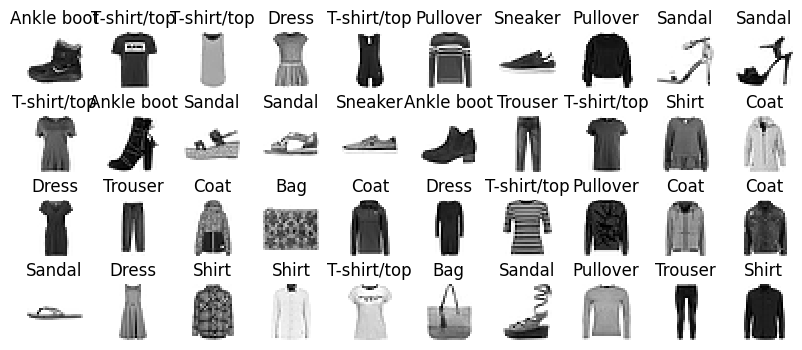

In [52]:

n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols, n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(categories[y_train_full[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [23]:
print(X_train_full.dtype)

uint8


 Data Preparation

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 5000, random_state = 42, stratify = y_train_full)

In [25]:
print("Train set shape: ",X_train.shape)
print("Validation set shape: ",X_val.shape)

Train set shape:  (55000, 28, 28)
Validation set shape:  (5000, 28, 28)


In [26]:
#the data is in integers, to convert it into floating values
X_train_scaled, X_val_scaled, X_test_scaled = X_train/255. , X_val/255. , X_test/255.

Modeling

In [31]:
#this ensure that the random seed set for all the layers are same throughout
tf.random.set_seed(42)

#this indicates that we are importing a sequential model
model = tf.keras.Sequential()

#initializes the following layers to be stacked into the model
#initializes input layer with specific input shape (28,28)
#note that here, we are giving the input as a 2D array
model.add(tf.keras.layers.Input(shape=[28,28]))

#the 2D array is converted into a 1D array of size 784
model.add(tf.keras.layers.Flatten())

#initialise first hidden layer with 300 neurons & relu activation function

#note: here, 'dense' means that every mini-batch from the input layer
#is connected to every neuron in the next hidden layer
model.add(tf.keras.layers.Dense(300, activation = "relu"))

#initialise second hidden layer with 100 neurons & relu activation function
#note: here, 'dense' means that every neuron from the first hidden layer
#is connected to every neuron in the next hidden layer
model.add(tf.keras.layers.Dense(300, activation = "relu"))

#note: here, 'dense' means that every neuron from the second hidden layer
#is connected to every neuron in the next hidden layer
model.add(tf.keras.layers.Dense(100, activation = "relu"))

#note: here, 'dense' means that every neuron from the third hidden layer
#is connected to every neuron in the output layer
#also, 10 neurons because #classes = 10
model.add(tf.keras.layers.Dense(10, activation = "softmax"))


In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,910 (1.36 MB)

 Trainable params: 356,910 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 **Compilation**

to run a model, you need to compile it.
after a model is created we compile it to specify the Loss function and the oprimizer to use (optional: metrics can be specified too)

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])


#Fitting the Model

here, the 32 mini-batchs are sent in batches of 1719 instances each and one batch of 24 instances through our network



In [35]:
history = model.fit(X_train_scaled, y_train, epochs = 30, validation_data=(X_val_scaled, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6594 - loss: 1.0530 - val_accuracy: 0.8300 - val_loss: 0.4847
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8260 - loss: 0.4977 - val_accuracy: 0.8528 - val_loss: 0.4237
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8444 - loss: 0.4381 - val_accuracy: 0.8620 - val_loss: 0.3944
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8556 - loss: 0.4043 - val_accuracy: 0.8694 - val_loss: 0.3726
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8646 - loss: 0.3804 - val_accuracy: 0.8746 - val_loss: 0.3594
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8707 - loss: 0.3618 - val_accuracy: 0.8770 - val_loss: 0.3471
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8756 - loss: 0.3466 - val_accuracy: 0.8800 - val_loss: 0.3355
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8808 - loss: 0.

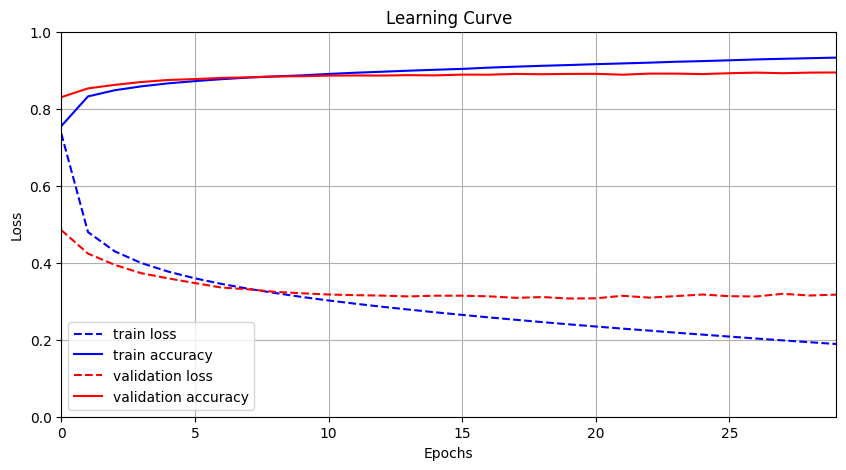

In [39]:
plt.figure(figsize = (10,5))
plt.plot(history.history["loss"], "b--", label = "train loss")
plt.plot(history.history["accuracy"], "b-", label = "train accuracy")
plt.plot(history.history["val_loss"], "r--", label = "validation loss")
plt.plot(history.history["val_accuracy"], "r-", label = "validation accuracy")

plt.xlim(0, 29)
plt.ylim(0, 1)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.grid()
plt.legend()
plt.title("Learning Curve")

plt.show()

In [43]:
#shows the predictions for the first 10 instances from test set
test_pred_probas = model.predict(X_test[:10])
print(test_pred_probas.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [48]:
#extracts predictions (drop-in replacement for categories) from the probability distribution
test_preds = test_pred_probas.argmax(axis=-1)
print(test_preds)

[9 2 1 1 6 1 4 6 5 7]


In [47]:
# Extracts mapped categories from predicted category indexes
test_pred_categories = [categories[test_pred] for test_pred in test_preds]

# Extracts mapped categories from category indexes for test instances
true_categories = [categories[y] for y in y_test[:10]]

In [49]:
# Shows predicted and true categories side-by-side for comparison
pd.DataFrame({
    "Predicted Category": test_pred_categories,
    "True Category": true_categories
})

,Predicted Category,True Category
0,Ankle boot,Ankle boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
5,Trouser,Trouser
6,Coat,Coat
7,Shirt,Shirt
8,Sandal,Sandal
9,Sneaker,Sneaker


In [50]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
#performs prediction over entire test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.3777


In [51]:
print("Test lossL {:.2f}".format(test_loss))
print("Test accuracy: {:.0f}%".format(test_accuracy * 100))

Test lossL 0.38
Test accuracy: 88%
